First, I import some of the standard libraries that will be later useful for writing my code.

In [455]:
import numpy as np
import matplotlib.pyplot as plt

$\textbf{Problem 1}$

(a) (I use $h$ instead of $\delta$ because it is easier to type)

We have the following Taylor Series expansions for the function $f$ evaluated at $x + h, x-h, x+2h, x-2h$ respectively:

$f(x+h) = f(x) + f^{(1)}(x) h + \frac{1}{2} f^{(2)}(x) h^2 + \frac{1}{6} f^{(3)}(x) h^3 + \frac{1}{24} f^{(4)}(x) h^4 + \frac{1}{120} f^{(5)}(x) h^5 + O(h^6)$
$f(x-h) = f(x) - f^{(1)}(x) h + \frac{1}{2} f^{(2)}(x) h^2 - \frac{1}{6} f^{(3)}(x) h^3 + \frac{1}{24} f^{(4)}(x) h^4 - \frac{1}{120} f^{(5)}(x) h^5 + O(h^6)$

$f(x+2h) = f(x) + 2f^{(1)}(x) h + 2 f^{(2)}(x) h^2 + \frac{4}{3} f^{(3)}(x) h^3 + \frac{2}{3} f^{(4)}(x) h^4 + \frac{4}{15} f^{(5)}(x) h^5 + O(h^6)$
$f(x-2h) = f(x) - 2f^{(1)}(x) h + 2 f^{(2)}(x) h^2 - \frac{4}{3} f^{(3)}(x) h^3 + \frac{2}{3} f^{(4)}(x) h^4 - \frac{4}{15} f^{(5)}(x) h^5 + O(h^6)$

The goal is to write:

$f^{(1)}(x) \approx \frac{\text{Linear combination (with integer coefficients) of }f(x+h), f(x-h), f(x+2h), f(x-2h)}{\text{(Integer)} \cdot h} $

and to try to maximize our accuracy by causing as many higher order cancellations in the Taylor Series as possible, but to NOT cancel out the first order term. To this end, consider a linear combination of the form:

$a f(x+h) - a f(x-h) + b f(x+2h) - b f(x-2h) = (2a + 4b) f^{(1)}(x) \cdot h + (\frac{a}{3} + \frac{8b}{3}) f^{(3)}(x) \cdot h^3 + O(h^5)$, which ensures that the ZEROTH, SECOND and FOURTH order terms automatically cancel out. Now we can choose $a,b$ such that the cubic term vanishes. This is furnished, for example, by choosing $a = 8, b = -1$. We can then solve the equation for $f^{(1)}(x)$ to get (to within $O(h^5)$):

$f^{(1)}(x) \approx \frac{8f(x+h) - 8f(x-h) + f(x-2h) - f(x+2h)}{12 h}$

This is the desired formula.

(b)

Estimation of the Error $E$.

We have:

$f^{(1)}_{\text{numerical}}(x) \approx \frac{1}{12h}\bigg( 8 [f(x) + f^{(1)}(x) h + \frac{1}{2} f^{(2)}(x) h^2 + \frac{1}{6} f^{(3)}(x) h^3 + \frac{1}{24} f^{(4)}(x) h^4 + \frac{1}{120} f^{(5)}(x) h^5][1 + g_{1+}\epsilon] - 8[f(x) - f^{(1)}(x) h + \frac{1}{2} f^{(2)}(x) h^2 - \frac{1}{6} f^{(3)}(x) h^3 + \frac{1}{24} f^{(4)}(x) h^4 - \frac{1}{120} f^{(5)}(x) h^5][1 + g_{1-}\epsilon] + [f(x) - 2f^{(1)}(x) h + 2 f^{(2)}(x) h^2 - \frac{4}{3} f^{(3)}(x) h^3 + \frac{2}{3} f^{(4)}(x) h^4 - \frac{4}{15} f^{(5)}(x) h^5][1 + g_{2-}\epsilon] - [f(x) + 2f^{(1)}(x) h + 2 f^{(2)}(x) h^2 + \frac{4}{3} f^{(3)}(x) h^3 + \frac{2}{3} f^{(4)}(x) h^4 + \frac{4}{15} f^{(5)}(x) h^5][1+g_{2+}\epsilon]\bigg)$

The right hand side function and derivative evaluations are the mathematically exact values, and the $g$'s are numerical error values of order $O(1)$. $\epsilon$ is the numerical precision and is $10^{-7}/10^{-16}$ for single/double precision respectively. If we ignore terms of order $h \epsilon$ and higher in the parentheses, and note that by construction of the expression for $f^{(1)}_{\text{numerical}}(x)$, all terms upto fourth order in the Taylor series cancel out, we are left with:

$f^{(1)}_{\text{numerical}}(x) \approx \frac{1}{12h}\bigg( f_{\text{exact}}(x) \epsilon [8g_{1+} - 8g_{1-} + g_{2-} - g_{2+}] + 12 f^{(1)}_{\text{exact}} \cdot h + \bigg[ \frac{16}{120} + \frac{8}{15}\bigg] f^{(5)}_{\text{exact}} h^5 \bigg) $

Defining $g = 8g_{1+} - 8g_{1-} + g_{2-} - g_{2+} \approx O(1)$, we get for the error $E$:

$E$ = $|f^{(1)}_{\text{numerical}}(x) - f^{(1)}_{\text{exact}}| \approx \bigg| \frac{1}{12h}f_{\text{exact}}(x) g \epsilon + \frac{1}{18} f^{(5)}_{\text{exact}}(x) \cdot h^4 \bigg| $. 

Take the derivative of the RHS and set it to zero:

$\implies \frac{2}{9} f^{(5)}_{\text{exact}}(x) \cdot h^3 - \frac{1}{12h^2} f_{\text{exact}}(x) g \epsilon = 0$

$\implies h = \bigg( \frac{3}{8} \bigg| g \frac{f_{\text{exact}}(x)}{f^{(5)}_{\text{exact}}(x)} \bigg| \epsilon \bigg)^{\frac{1}{5}} $.

In order to get some numerical estimates, let $g = 1$, $\epsilon = 10^{-16}$, $f_1(x) = e^{x}$ and $f_2(x) = e^{0.01x}$. Then the desired values of $h$ ($h_1$ and $h_2$ respectively):

$ h_1 \approx \bigg(\frac{3}{8}\epsilon \bigg)^{\frac{1}{5}} \approx 10^{-\frac{16}{5}} \approx 10^{-3}$



and $h_2 \approx \bigg(\frac{3}{8}\frac{\epsilon}{(0.01)^5} \bigg)^{\frac{1}{5}} \approx 100 \epsilon^{1/5} \approx 100 * 10^{-3} \approx 10^{-1}$

Let's now write some code to test this out.

The algorithm is as follows. First I define the functions and their exact (analytic) derivatives. I then define a set of x values at which these functions and the numerical derivatives will be evaluated. I also define an array of various dx sizes (I do it log space first and then take the exponential like we did in class to easily cover a wide range of dx values). Then for each value of x, I evaluate the exact and the numerical derivative (using the expression derived above) for each value of dx (this I do simultaneously with array manipulation, while I use a loop to iterate through each x value). I then compute the absolute value of the difference between the exact and numerical value and do a log-log plot of Error vs dx for each value of x. I superimpose the plots.

The rationale for doing it at various values of x is so that I can make sure that the optimal value of dx is practically independent of x, as indicated by theory. Too many x-values are not necessary for this since the exponential function is already smooth to arbitrary order and so I chose 6 sample x values which illustrate the point (and also so that the plots don't look too cluttered). Plots are shown below the code block. I indeed find that my estimates are pretty close to what is actually observed, i.e., the optimal dx for $f(x) = e^{x}$ is around $10^{-3}$ and for $f(x) = e^{0.01x}$ is around $10^{-1}$.

<Figure size 720x360 with 0 Axes>

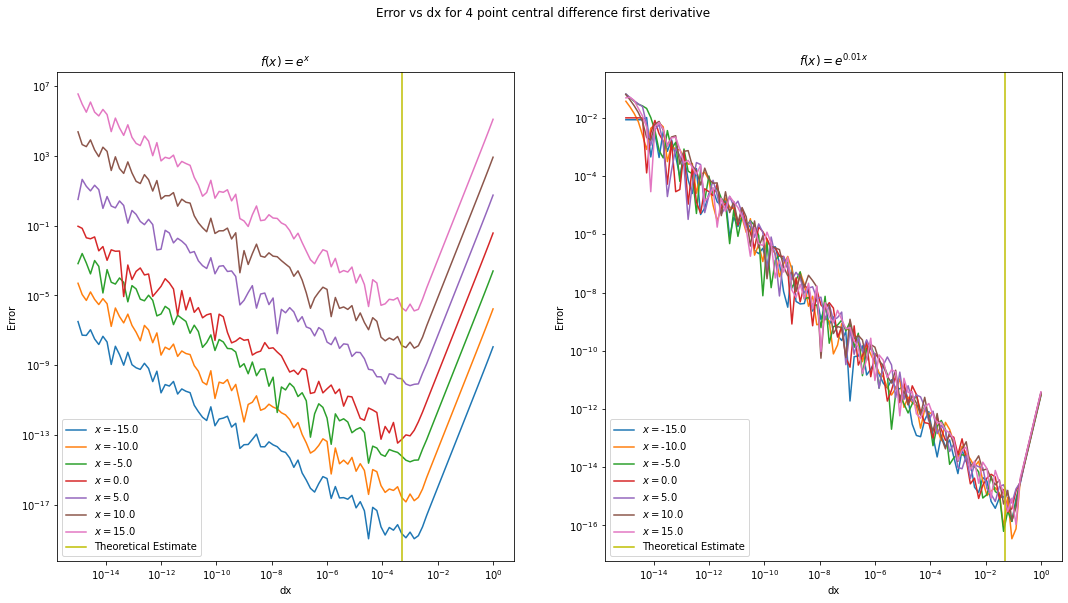

In [456]:
def f1(x):
    return np.exp(x)

def f1_prime(x):
    return np.exp(x)

def f2(x):
    return np.exp(0.01 * x)

def f2_prime(x):
    return 0.01 * np.exp(0.01 * x)

epsilon = 1E-16
h1 = ((3*epsilon)/8)**(1/5)
h2 = 100*h1


#Points for evaluating the functions and their derivatives
N = 7
x = np.linspace(-15,15,N)


#array for various dx sizes
Ndx = 101
logdx = np.linspace(-15,0,Ndx)
dx = 10**(logdx)
min_dx1 = np.zeros(N)
min_dx2 = np.zeros(N)

#Set-up of a figure for the subplots
plt.clf()
plt.rcParams["figure.figsize"] = (18,9)
fig, axes = plt.subplots(1,2)
ax1 = axes[0]
ax2 = axes[1]


for i in range(N):
    der_f1_exact = f1_prime(x[i])
    der_f1_num = (f1(x[i] - 2*dx) + 8*f1(x[i] + dx) - 8*f1(x[i] - dx) - f1(x[i]+2*dx))/(12*dx)
    err1 = np.abs(der_f1_num - der_f1_exact)
    der_f2_exact = f2_prime(x[i])
    der_f2_num = (f2(x[i] - 2*dx) + 8*f2(x[i] + dx) - 8*f2(x[i] - dx) - f2(x[i]+2*dx))/(12*dx)
    err2 = np.abs(der_f2_num - der_f2_exact)
    ax1.loglog(dx, err1, label = "$x = ${}".format(x[i]))
    ax2.loglog(dx, err2, label = "$x = ${}".format(x[i]))
    
fig.suptitle("Error vs dx for 4 point central difference first derivative")
ax1.axvline(x=h1, c='y', label="Theoretical Estimate")
ax1.set_title("$f(x) = e^{x}$")
ax1.set_xlabel("dx")
ax1.set_ylabel("Error")
ax2.axvline(x=h2, c='y', label="Theoretical Estimate")
ax2.set_title("$f(x) = e^{0.01x}$")
ax2.set_xlabel("dx")
ax2.set_ylabel("Error")
ax1.legend()
ax2.legend()
plt.show()



Problem 2

I first wrote a function `optimal_dx(fun,x)` that takes the function and the value of $x$ as arguments and returns the optimal value of $dx$ for computing the derivative. The idea is to find the $dx$ value that minimizes the difference between the function at $x+dx$ and the Taylor approximation:

$ E = | f(x+dx) - f(x) - f'_{\text{numerical}}(x) dx |  = \bigg| f(x) - \frac{(f(x+dx) + f(x-dx))}{2} \bigg|$

In the "minimization", I had to be careful to exclude very small values of dx since the error there is dominated by roundoff and so it is very noisy and can occasionally become very small. I took inspiration from the plots above (and played around with some other functions as well) to see that for large dx, the error is always monotonically increasing. To this end, what optimal_dx() does is it creates an array of various dx sizes, computes the error $E$ given by the formula above for each value of dx and then loops through the error array starting from the largest allowed dx and going backwards to find the point where the error changes from being monotonically increasing to developing a "kink" i.e, when $E(dx_i) - E(dx_{i-1})$ changes sign from positive to negative. I then take the first instance of this sign change as the "optimal" dx, which, as can be seen in the plot below, is a pretty decent estimate.

The function ndiff(fun, x, full=True) then computes the optimal dx value for the input fun and x, calculates the central difference numerical derivative and estimates the error as follows:

$f'_{\text{numerical}}(x) \approx \frac{f(x+dx) - f(x-dx)}{2 dx} \approx \frac{1}{2dx}\bigg([f(x) + f'(x)dx][1+g_+ \epsilon] - [f(x) - f'(x)dx)][1+g_- \epsilon] \bigg) \approx \frac{f(x) [g_+ - g_-] \epsilon}{2dx} + f'(x)$

$\implies \text{error} \approx \bigg| \frac{f(x) [g_+ - g_-] \epsilon}{2dx} \bigg| \approx \bigg| \frac{f(x) \epsilon}{2dx} \bigg|$

with $\epsilon = 10^{-16}$ in this case. Finally, depending on whether full=True or full=False, it returns the derivative, dx and error, or just the derivative, respectively.

As a trial, I use $f(x) = \cos{x}$ and evaluate the derivative at x=1. The plot and the values printed below the code correspond to this test case. As can be seen, the error estimate is also in the correct order of magnitude! (Although I am not fully certain if it would work for, say $\cos{0.01x}$.)

Optimal dx value is  5.3088444423098795e-08
Estimated error in the derivative is  5.08869973248881e-10
Actual error in the derivative is  2.5196311703723495e-10


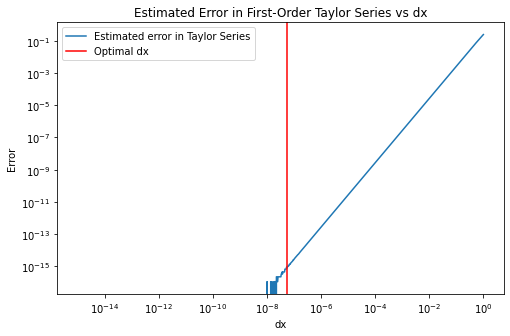

In [457]:
plt.ion()
plt.rcParams["figure.figsize"] = (8,5)

def optimal_dx(fun,x):
    
    # Set-up array of various dx sizes
    Ndx = 1001
    logdx = np.linspace(-15,0,Ndx)
    dx = 10**(logdx)
    
    # Define the error estimate
    error = np.abs((fun(x+dx) + fun(x-dx))/(2) - fun(x))
    
    # Loop through error array to look for sign change
    for i in range(Ndx):
        if error[Ndx-i-1] - error[Ndx-i-2] < 0:
            index = Ndx-i-2
            break
    
    # Plotting and Printing Results
    plt.loglog(dx, error, label="Estimated error in Taylor Series")
    optimal_dx_value = dx[index]
    plt.axvline(x=optimal_dx_value, c='r', label = "Optimal dx")
    plt.legend()
    plt.title("Estimated Error in First-Order Taylor Series vs dx")
    plt.xlabel("dx")
    plt.ylabel("Error")
    print("Optimal dx value is ", optimal_dx_value)
    
    # Return optimal dx value
    return optimal_dx_value

def ndiff(fun, x, full=False):
    
    # Compute optimal dx value
    dx = optimal_dx(fun,x)
    
    # Compute the central difference derivative
    num_der_fun = (fun(x+dx) - fun(x-dx))/(2*dx)
    
    # Numerical Precision
    epsilon = 1E-16
    
    # Error Estimate from formula given above
    estimated_error = np.abs(fun(x)*epsilon/2/dx)
    
    # Return results based on truth value of "full"
    if full==True:
        return num_der_fun, dx, estimated_error
    elif full==False:
        return num_der_fun


# Test with some function and value of x
fun = np.cos
derivative, dx, error = ndiff(fun, x=1.0, full=True)

# Print Estimated and Actual Errors
print("Estimated error in the derivative is ", error)
print("Actual error in the derivative is ", np.abs(-np.sin(1.0) - derivative))

Problem 3

First, let's get the data and plot it to see what it looks like before deciding on an interpolation scheme.

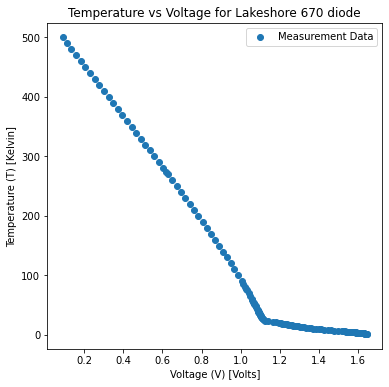

In [458]:
datafile_url = "https://raw.githubusercontent.com/sievers/phys512-2022/master/problem_sets/lakeshore.txt"

data = np.loadtxt(datafile_url)
T_input = data[:,0]
V_input = data[:,1]
dVdT_input = data[:,2]

plt.rcParams["figure.figsize"] = (6,6)
plt.scatter(V_input,T_input, label = "Measurement Data")
plt.xlabel("Voltage (V) [Volts]")
plt.ylabel("Temperature (T) [Kelvin]")
plt.title("Temperature vs Voltage for Lakeshore 670 diode")
plt.legend()
plt.show()

I will plot V_input to see if it is properly sorted or if I need to move things around to sort it in ascending order, which will be later useful for my function

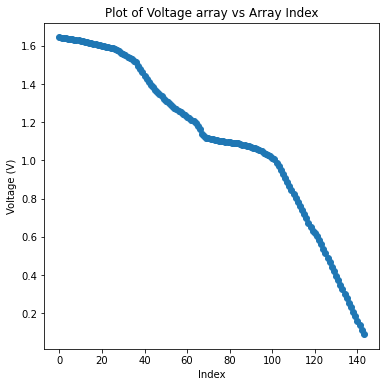

In [459]:
plt.scatter(range(np.size(V_input)), V_input)
plt.xlabel("Index")
plt.ylabel("Voltage (V)")
plt.title("Plot of Voltage array vs Array Index")
plt.show()

This is not sorted, so let's sort `data` based on the second (Voltage) column. We can use `np.argsort` to do this. `1dArray.argsort()` returns the indices of the sorted array. so we can splice out the second column of data, sort the indices for this column and then shuffle the entries of data according to this sorted list of indices. numpy now works with the syntax used below as can be found in their documentation.

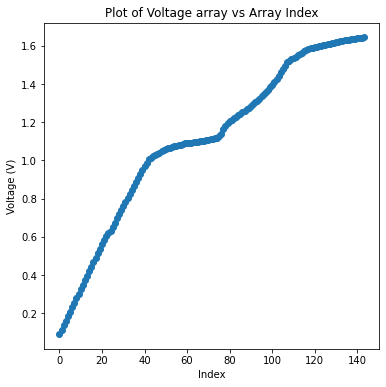

In [460]:
data = data[data[:,1].argsort()]
V_input = data[:,1]
T_input = data[:,0]
plt.scatter(range(np.size(V_input)), V_input)
plt.xlabel("Index")
plt.ylabel("Voltage (V)")
plt.title("Plot of Voltage array vs Array Index")
plt.show()

Assuming that the data (apart from the kink) is reasonably smooth, I will use a cubic polynomial fit, but not a spline since the data has a kink and I do not want to smooth it out with some wiggles. The reason for this is that for a given value of $V$, I need to choose 4 points to do the interpolation. This gives me some freedom. For example, suppose $V_{\text{data}}[4]<V<V_{\text{data}}[5]$, then I can choose either $\bigg( V_{\text{data}}[4], V_{\text{data}}[5], V_{\text{data}}[6], V_{\text{data}}[7] \bigg)$ or $\bigg( V_{\text{data}}[3], V_{\text{data}}[4], V_{\text{data}}[5], V_{\text{data}}[6] \bigg) $ as the points between which I interpolate. Other choices exist, but these are the ones I've chosen for the sake of illustration. By comparing the two interpolations and averaging over them, I can get a final interpolation value and by looking at the difference between the two interpolations, I can get a numerical estimate of the error.

The function `lakeshore(V, data)` takes the point(s) at which we want the interpolated values (V) and the 2-d input data `data` with the first column corresponding to temperature and the second to voltage. First, it sorts the input data in ascending order of voltage. It then iterates over `V` and finds the interval in which `V[i]` lies, and finds the nearest neighbors according to the two approaches outlined above. It then fits a cubic polynomial to each interval (using `np.polyfit`) and computes the interpolated values (using `np.polyval`) . I finally average the two interpolations for the "correct" interpolated result and take the absolute value of their difference to get an estimate for the error. The function returns the interpolated result and the error.

Finally, I call the function on the actual data and make some plots.

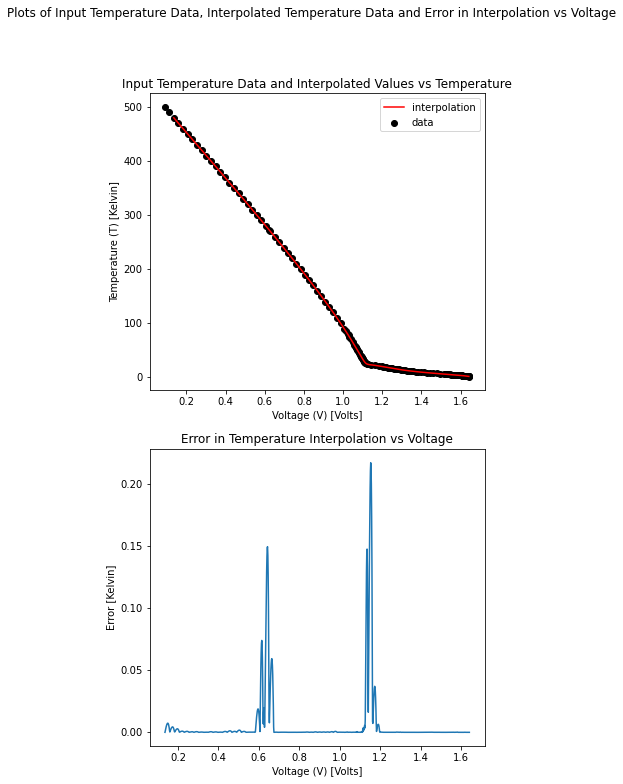

In [461]:
V_fine = np.linspace(V_input[2], V_input[-3], 1001)

def lakeshore(V, data):
    data = data[data[:,1].argsort()]
    T_data = data[:,0]
    V_data = data[:,1]
    interpolated_T = np.zeros(np.size(V))
    interpolated_T1 = np.zeros(np.size(V))
    interpolated_T2 = np.zeros(np.size(V))
    error = np.zeros(np.size(V))
    for i in range(np.size(V)):
        ind = np.max(np.where(V[i]>=V_data)[0])
        V_use1 = V_data[ind-1:ind+3]
        T_use1 = T_data[ind-1:ind+3]
        V_use2 = V_data[ind-2:ind+2]
        T_use2 = T_data[ind-2:ind+2]

        poly_params1 = np.polyfit(V_use1, T_use1, 3)
        poly_params2 = np.polyfit(V_use2, T_use2, 3)

        interpolated_T1[i] = np.polyval(poly_params1, V[i])
        interpolated_T2[i] = np.polyval(poly_params2, V[i])
    
    interpolated_T = (interpolated_T1 + interpolated_T2)/2.
    error = np.abs(interpolated_T1 - interpolated_T2)

    return interpolated_T, error

interpolated_T, error = lakeshore(V_fine, data)


plt.rcParams["figure.figsize"] = (6,12)
fig,axs = plt.subplots(2,1)
fig.suptitle("Plots of Input Temperature Data, Interpolated Temperature Data and Error in Interpolation vs Voltage")
ax1 = axs[0]
ax2 = axs[1]
ax1.plot(V_fine, interpolated_T, c='r', label = 'interpolation')
ax1.scatter(V_input, T_input, c='k', label = 'data')
ax1.set_xlabel('Voltage (V) [Volts]')
ax1.set_ylabel('Temperature (T) [Kelvin]')
ax1.set_title("Input Temperature Data and Interpolated Values vs Temperature")
ax1.legend()
ax2.plot(V_fine, error)
ax2.set_xlabel('Voltage (V) [Volts]')
ax2.set_ylabel('Error [Kelvin]')
ax2.set_title("Error in Temperature Interpolation vs Voltage")

plt.show()



Problem 4

I will write my code in small blocks with function definitions, with each block preceded by a detailed explanation of how the function works and what it does.

First I define wrapper functions to put around $\cos{x}$ and $F(x) = \frac{1}{1+x^2}$, just to make it easier to type call them later (this step is clearly unnecessary).

In [462]:
def f1(x):
    return np.cos(x)

def f2(x):
    return 1/(1+x**2)

In the next block, I will set-up the polynomial fit. First I define a function `P(i,x_data,x)` which takes an integer `i`, an array `x_data` and a float `x` as input and will evaluate and return the value of the polynomial expression:

$P_i(x) = \frac{(x-x_0)(x-x_1)...(x-x_{i-1})(x-x_{i+1})....(x-x_n)}{(x_i-x_0)(x_i-x_1)...(x_i-x_{i-1})(x_i-x_{i+1})....(x_i-x_n)} $

where $x_i \in $ `x_data`. This polynomial is zero when $x = x_{j \neq i}$ and one when $x=x_i$. The way it evaluates this is by first taking the array `x_data` and deleting the $i^{th}$ element `x_data[i]` from it. I've called the new array so created `a`. I then use array manipulation (and python's broadcasting) to take the product of the elements of the arrays `a-x` and `a-x[i]` separately, and return the ratio, which gives $P_i(x)$.

Then I define the function `polyinterpolate(x_data, func, X)` which takes an array `x_data` (points at which we know the function), a function `func` and another array `x` (the points at which we wish to interpolate) as inputs. I then define a new array `y` which will be used to store the values of the interpolated function evaluated at the points in `x`. I iterate through each element `x[j]` and define a temporary variable `interpolatedfunc` which stores the value of:

$ \sum_{i=0}^{n} \text{func}(x_i) P_i(x) $ which is the polynomial interpolation formula for $f(x)$. I perform the sum by iterating through each element `x_data[i]` and summing the result of each iteration. I then store this value at `y[j]`. I finally return the array `y`.

In [463]:
def P(i,x_data,x):
    a = np.delete(x_data, i)
    numerator = np.product(a-x)
    denominator = np.product(a - x_data[i])
    return numerator/denominator

def polynomialinterpolate(x_data, func, X):
    
    y = np.zeros(len(X))
    for j in range(len(X)):
        interpolatedfunc = 0
        for i in range(len(x_data)):
            interpolatedfunc += func(x_data[i])*P(i,x_data,X[j])
        y[j] = interpolatedfunc
    return y



Next I do the set-up for the rational function interpolation. For this I use two functions: `evaluate_rational_pinv(p_params, q_params, X)` and `rationalinterpolate(x_data, func, n=1, m=1)`. The second of these takes the input data and the function, along with the orders of the numerator and denominator for the rational interpolation as inputs and will return the coefficients of the rational polynomial as output. The first function above then takes the parameters and the array at which we wish to evaluate the interpolated function as inputs and performs this evaluation and returns the interpolated function values as the output.

$\textbf{Although I have not directly copied any of this code from anywhere, it is quite similar in logic to what was discussed in class.}$

First I will briefly describe the general process of rational interpolation, and then I will describe how each of these functions work to implement the algorithm. 

Suppose I would like to interpolate a function using the following ansatz:

$f(x) = \frac{P(x)}{1 + Q(x)} = \frac{p_0 + p_1 x + p_2 x^2 + ...}{1 + q_1 x + q_2 x^2 + ...}$

$\implies f(x) = P(x) - f(x) Q(x)$

given a set of points $S = \{(x_i, y_i = f(x_i))\}$ where the function values are known. As done in class, suppose the order of the numerator is $n$ and that of the denominator is $m$ such that there are $n+m+1$ unknown coefficients. Further assume that there are exactly $n+m+1$ elements in $S$. For each $(x_i, y_i)$, we have an equation:

$ y_i = (p_0 + p_1 x_i + ... + p_n x_i^n) - (y_i q_1 x_i + y_i q_2 x_i^2 + ... y_i q_m x_i^m) $

$$ \implies \begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ . \\ . \\ y_{n+m+1} \end{bmatrix} = \begin{bmatrix} 
1 && x_0 && x_0^2 && . && . && x_0^n && -y_0 x_0 && -y_0 x_0^2 && . && . && -y_0 x_0^m \\ 
1 && x_1 && x_1^2 && . && . && x_1^n && -y_1 x_1 && -y_1 x_1^2 && . && . && -y_1 x_1^m  \\
1 && x_2 && x_2^2 && . && . && x_2^n && -y_2 x_2 && -y_2 x_2^2 && . && . && -y_2 x_2^m  \\
. && . && . && . && . && . && . && . && . && . && .  \\
. && . && . && . && . && . && . && . && . && . && .  \\
1 && x_{n+m+1} && x_{n+m+1}^2 && . && . && x_{n+m+1}^n && -y_{n+m+1} x_{n+m+1} && -y_{n+m+1} x_{n+m+1}^2 && . && . && -y_{n+m+1} x_{n+m+1}^m  
\end{bmatrix} \begin{bmatrix} p_0 \\ p_1 \\ . \\ . \\ p_n \\ q1 \\ . \\ . \\ qm \end{bmatrix} $$

$ \implies \textbf{y} = \textbf{A} \cdot \textbf{p} $

$ \implies \textbf{p} = \textbf{A}^{-1} \cdot \textbf{y} $.

Solving this last equation then gives us all the coefficients with which we can evaluate the rational polynomial at any desired $x$. 

Now onto discussing how I implemented this using the two functions defined below.

(i) `rationalinterpolate_inv(x_data, func, n=1, m=1)`

First, I make sure that the input data is of the right size. If the condition $ \text{number of data points} = n+m+1$ is not satisfied, the code will raise an `Assertion Error`. I then use `func(x_data)` to evaluate the (presumed known) `y_data`. I define a matrix `PQ` of size $(n+m+1, n+m+1)$ to store the matrix $\textbf{A}$ defined above. 

I then iterate through each input data point using
`for i in range(len(x_data)):`

and compute two arrays `xi_n = ( 1 x[i] x[i]**2 ... x[i]**n )` and `yi_xi_m = ( -y[i]*x[i] -y[i]*x[i]**2 ... -y[i]*x[i]**m )` which is done by these two lines of code:

`xi_n = x_data[i] ** np.arange(n+1)
yi_xi_m = - y_data[i] * (x_data[i] ** np.arange(1,m+1))`

I then horizontally stack these and fill row `i` of the matrix `PQ` with this using:

`PQ_matrix[i,:] = np.hstack([xi_n, yi_xi_m])`

After doing this, I evaluate the column vector `params` (denoted $\textbf{p}$ above) according to the above formula using:

`params = np.dot(np.linalg.inv(PQ_matrix), y_data)`

and separate out the entries corresponding to the indices `0 ... n` as the coefficients of $P(x)$ and the indices `n+1 ... n+m+1` as the coefficients of $Q(x)$ and return these two sets of coefficients.

$\textit{The function }$ `rationalinterpolate_pinv` $\textit{ simply replaces }$ `inv` $\textit{ with }$ `pinv`. I will use this later when dealing with the Lorentzian.

(ii) `evaluate_rational(p_params, q_params, X)`

I define a zero array `evaluated_func = np.zeros(len(X))` of the same size as the array `X` of points where we wish to evaluate the interpolation. I then recompute the orders $n$ and $m$ using:

`n = np.size(p_params)-1
m = np.size(q_params)`

I then iterate through each `X[i]` and compute the arrays `xn = [ 1 X[i] X[i]**2 ... X[i]**n ]` and `xm = [ X[i] X[i]**2 ... X[i]**m ]`. The numerator is then computed as the sum of the element-wise product of the arrays `p_params * xn`, i.e., by `top = np.sum(p_params*xn)` and similarly the denominator is given by `bottom = 1+np.sum(q_params*xm)`. Finally the array element `evaluated_func[i]` is filled by the value of the ratio `top/bottom`. After finishing the iteration over `X`, the function returns the array `evaluated_func`.

In [464]:
def evaluate_rational(p_params, q_params, X):
    evaluated_func = np.zeros(len(X))
    n = np.size(p_params)-1
    m = np.size(q_params)
    for i in range(len(X)):
        xn = X[i] ** np.arange(n+1)
        xm = X[i] ** np.arange(1,m+1)
        top = np.sum(p_params*xn)
        bottom = 1+np.sum(q_params*xm)
        evaluated_func[i] = top/bottom
    return evaluated_func
        
def rationalinterpolate_pinv(x_data, func, n=1, m=1):
    assert(len(x_data) == n+m+1)
    y_data = func(x_data)
    PQ_matrix = np.zeros((n+m+1,n+m+1))
    for i in range(len(x_data)):
        xi_n = x_data[i] ** np.arange(n+1)
        yi_xi_m = - y_data[i] * (x_data[i] ** np.arange(1,m+1))
        PQ_matrix[i,:] = np.hstack([xi_n, yi_xi_m])
    params = np.dot(np.linalg.pinv(PQ_matrix), y_data)
    p_params = params[:n+1]
    q_params = params[n+1:]
    return p_params, q_params

def rationalinterpolate_inv(x_data, func, n=1, m=1):
    assert(len(x_data) == n+m+1)
    y_data = func(x_data)
    PQ_matrix = np.zeros((n+m+1,n+m+1))
    for i in range(len(x_data)):
        xi_n = x_data[i] ** np.arange(n+1)
        yi_xi_m = - y_data[i] * (x_data[i] ** np.arange(1,m+1))
        PQ_matrix[i,:] = np.hstack([xi_n, yi_xi_m])
    params = np.dot(np.linalg.inv(PQ_matrix), y_data)
    p_params = params[:n+1]
    q_params = params[n+1:]
    return p_params, q_params

Since for the Cubic Spline I will use the inbuilt scipy function instead of writing my own code, I will next define the points at which I know the function values (`x_data`) and the points at which I wish to interpolate (`x_fine`).

In [465]:
n = 2
m=3
x_data = (np.pi/2) * np.linspace(-1,1,n+m+1)
x_fine = (np.pi/2)* np.linspace(-1.1,1.1,1001)

Next, I import the Cubic spline function.

I will make a detour here to explain the idea behind scipy's cubic spline. A clear explanation is given at https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.03-Cubic-Spline-Interpolation.html with nice figures. I will simply try to summarize what is explained there (and was discussed in class) briefly.

We take our array `x_data` consisting of $n+1 (= 11 \text{ here})$ points $[ x_0 x_1 .... x_n ]$ and break it into n intervals $[x_0 x_1], [x_1, x_2] ..., [x_{n-1} x_n]$ and define cubic polynomials $S_i(x) = s_{i0} + s_{i1} x + s_{i2} x^2 + s_{i3} x^3$ which will be our ansatz for $f(x)$ when $x$ is in the $i^{th}$ interval. For the spline, we require that (i) it pass through the actual data points and (i) it satisfy some smoothness conditions:

(i) $S_i(x_{i}) = y_i$ and $S_{i+1}(x_{i+1}) = y_{i+1} $ for $i = 0, 1, 2, ... n-1$, which furnishes 2(n) constraints.

(ii) $S'_j(x_{j+1}) = S'_{j+1}(x_{j+1})$ and $S''_j(x_{j+1}) = S''_{j+1}(x_{j+1})$ for $j = 0,1,2,...n-2$ which further furnishes 2(n-1) constraints.

The set of polynomials requires $4n$ coefficients to fully define, and we have $4n-2$ constraints from above, leaving two free constraints. The default choice that scipy makes is to impose:

(iii) $S'''_1(x_1) = S'''_2(x_1)$ and $S'''_{n-2}(x_{n-1}) = S'''_{n-1}(x_{n-1})$ which are the so-called "not-a-knot" conditions. These are useful in situations where we don't know anything about the behaviour of the derivatives of $f(x)$ at $x_0$ and $x_n$.

Putting all this together, we have $4n$ linear equations in the coefficients $s_{ij}$ which can be written as a matrix equation which is then inverted to get all the coefficients, along a somewhat similar vein to the rational interpolation. The exact details of this are tedious to type, but easy to understand and are explained in the website linked above.

In [466]:
from scipy.interpolate import CubicSpline

I will now write a generic error function that will compute the error between our interpolation and the exact function.

In [467]:
def error_array(interpolation, y_exact):
    return np.abs(interpolation-y_exact)

Now we are ready to simply call all the functions defined above with our input data (`x_data`), our function `f1(x)`$=\cos{x}$, and the array where we want the interpolated function values (`x_fine`) as is done in the block below. 

Note here that I call scipy's `CubicSpline` function it to get the piecewise polynomial interpolation on `x_data` and `y_data = f1(x_data)` which corresponds to $y = \cos{x}$. `scipy.interpolate.CubicSpline` is a class that returns a function. We will denote this function `cs`. Then, I call `cs` with `x_fine` as the argument and `cs` evaluates and returns an array of the interpolated function values at the points of `x_fine`.

The arrays `polynomialinterp`, `cubicsplineinterp` and `rationalinterp` are the interpolated values of the function at the points of `x_fine`. The arrays `polynomialerror`, `cubicsplineerror` and `rationalerror` store the corresponding errors.

In [468]:
polynomialinterp = polynomialinterpolate(x_data, f1, x_fine)
polynomialerror = error_array(polynomialinterp, f1(x_fine))

p_params, q_params = rationalinterpolate_inv(x_data, f1, n, m)
rationalinterp = evaluate_rational(p_params, q_params, x_fine)
rationalerror = error_array(rationalinterp, f1(x_fine))

cs = CubicSpline(x_data, f1(x_data))
cubicsplineinterp = cs(x_fine)
cubicsplineerror = error_array(cubicsplineinterp, f1(x_fine))

I plot the results

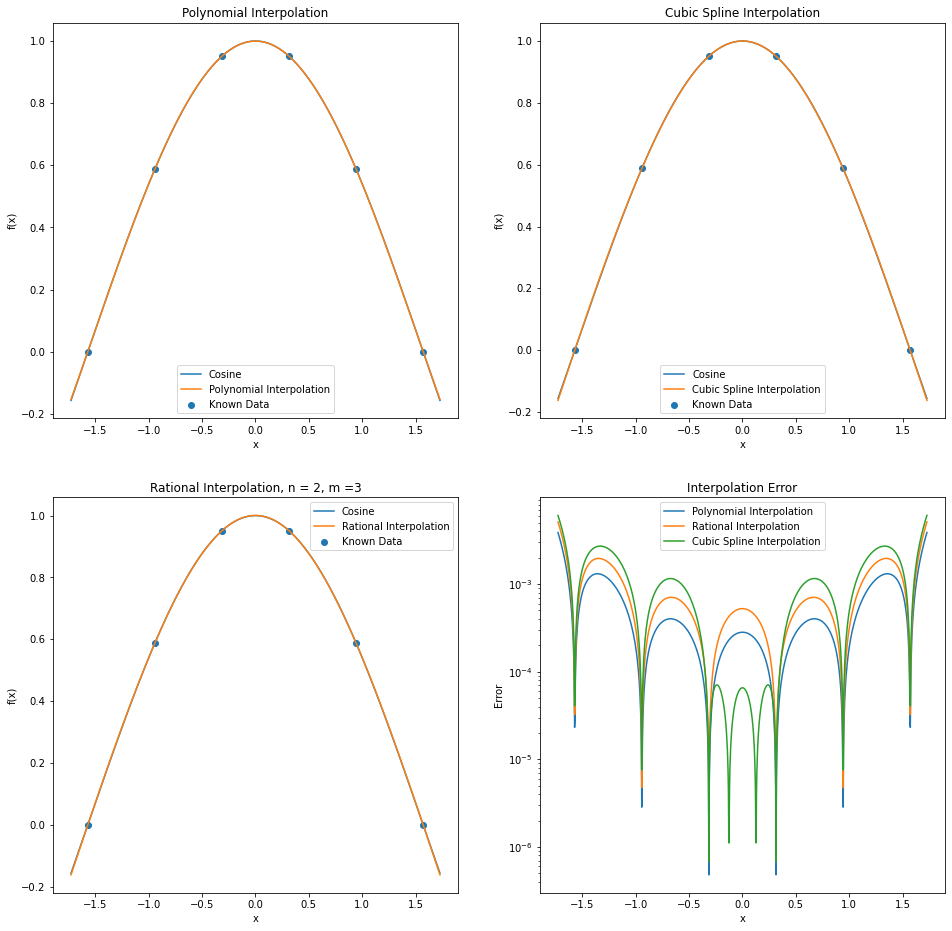

In [469]:
plt.rcParams['figure.figsize'] = (16,16)
fig, axs = plt.subplots(2,2)
ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]

ax1.plot(x_fine, f1(x_fine), label = 'Cosine')
ax1.plot(x_fine, polynomialinterp, label = 'Polynomial Interpolation')
ax1.scatter(x_data, f1(x_data), label = 'Known Data')
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")
ax1.set_title("Polynomial Interpolation")
ax1.legend()

ax2.plot(x_fine, f1(x_fine), label = 'Cosine')
ax2.plot(x_fine, cubicsplineinterp, label = 'Cubic Spline Interpolation')
ax2.scatter(x_data, f1(x_data), label = 'Known Data')
ax2.set_xlabel("x")
ax2.set_ylabel("f(x)")
ax2.set_title("Cubic Spline Interpolation")
ax2.legend()

ax3.plot(x_fine, f1(x_fine), label = 'Cosine')
ax3.plot(x_fine, rationalinterp, label = 'Rational Interpolation')
ax3.scatter(x_data, f1(x_data), label = 'Known Data')
ax3.set_xlabel("x")
ax3.set_ylabel("f(x)")
ax3.set_title("Rational Interpolation, n = {}, m ={}".format(n,m))
ax3.legend()

ax4.semilogy(x_fine, polynomialerror, label = 'Polynomial Interpolation')
ax4.semilogy(x_fine, rationalerror, label = 'Rational Interpolation')
ax4.semilogy(x_fine, cubicsplineerror, label = 'Cubic Spline Interpolation')
ax4.set_xlabel("x")
ax4.set_ylabel("Error")
ax4.set_title("Interpolation Error")
ax4.legend()

plt.show()

Now onto the Lorentzian. I will use `rationalinterpolate_inv` first, just to see how it does. If I use n=0, m=2, I expect the error for the Lorentzian to be exactly zero (as is confirmed on the plot, where I removed the log scale so we can clearly see the zero error of the rational fit, since the Lorentzian $\textit{is}$ a rational function with those orders.

In [470]:
n = 0
m = 2
x_data = np.linspace(-1,1, n+m+1)
x_fine = np.linspace(-1,1,1001)

polynomialinterp = polynomialinterpolate(x_data, f2, x_fine)
polynomialerror = error_array(polynomialinterp, f2(x_fine))

p_params, q_params = rationalinterpolate_inv(x_data, f2, n, m)
rationalinterp = evaluate_rational(p_params, q_params, x_fine)
rationalerror = error_array(rationalinterp, f2(x_fine))

cs = CubicSpline(x_data, f2(x_data))
cubicsplineinterp = cs(x_fine)
cubicsplineerror = error_array(cubicsplineinterp, f2(x_fine))

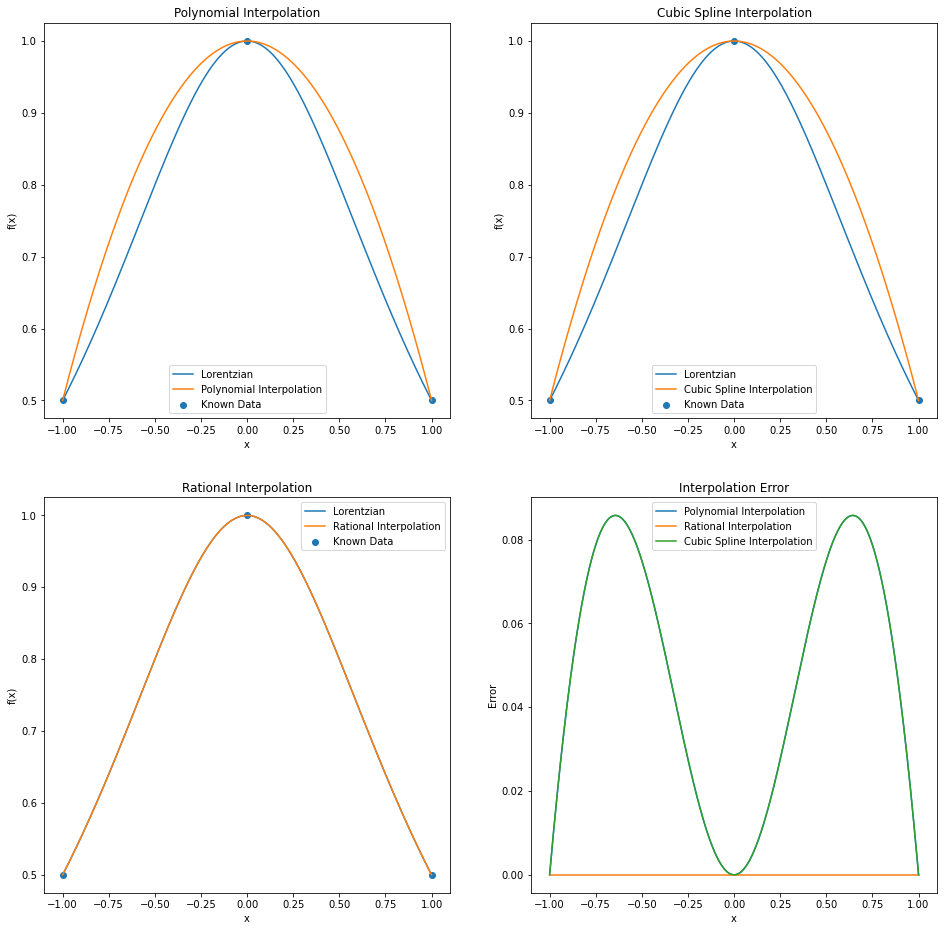

In [471]:
plt.rcParams['figure.figsize'] = (16,16)
fig, axs = plt.subplots(2,2)
ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]

ax1.plot(x_fine, f2(x_fine), label = 'Lorentzian')
ax1.plot(x_fine, polynomialinterp, label = 'Polynomial Interpolation')
ax1.scatter(x_data, f2(x_data), label = 'Known Data')
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")
ax1.set_title("Polynomial Interpolation")
ax1.legend()

ax2.plot(x_fine, f2(x_fine), label = 'Lorentzian')
ax2.plot(x_fine, cubicsplineinterp, label = 'Cubic Spline Interpolation')
ax2.scatter(x_data, f2(x_data), label = 'Known Data')
ax2.set_xlabel("x")
ax2.set_ylabel("f(x)")
ax2.set_title("Cubic Spline Interpolation")
ax2.legend()

ax3.plot(x_fine, f2(x_fine), label = 'Lorentzian')
ax3.plot(x_fine, rationalinterp, label = 'Rational Interpolation')
ax3.scatter(x_data, f2(x_data), label = 'Known Data')
ax3.set_xlabel("x")
ax3.set_ylabel("f(x)")
ax3.set_title("Rational Interpolation")
ax3.legend()

ax4.plot(x_fine, polynomialerror, label = 'Polynomial Interpolation')
ax4.plot(x_fine, rationalerror, label = 'Rational Interpolation')
ax4.plot(x_fine, cubicsplineerror, label = 'Cubic Spline Interpolation')
ax4.set_xlabel("x")
ax4.set_ylabel("Error")
ax4.set_title("Interpolation Error")
ax4.legend()

plt.show()

Comparing `np.linalg.inv` and `np.linalg.pinv` for large n,m. I basically call the `rationalinterpolate_inv` and `rational_interpolate_pinv` now with a new set of data points with size $n+m+1$. I then repeat the previous procedure for evaluating the rational functions and the associated errors. Finally, I plot my results.

In [472]:
n = 4
m = 5
x_data = np.linspace(-1,1, n+m+1)
x_fine = np.linspace(-1,1,1001)

p1_params, q1_params = rationalinterpolate_inv(x_data, f2, n, m)
rationalinterp1 = evaluate_rational(p1_params, q1_params, x_fine)
rationalerror1 = error_array(rationalinterp1, f2(x_fine))

p2_params, q2_params = rationalinterpolate_pinv(x_data, f2, n, m)
rationalinterp2 = evaluate_rational(p2_params, q2_params, x_fine)
rationalerror2 = error_array(rationalinterp2, f2(x_fine))

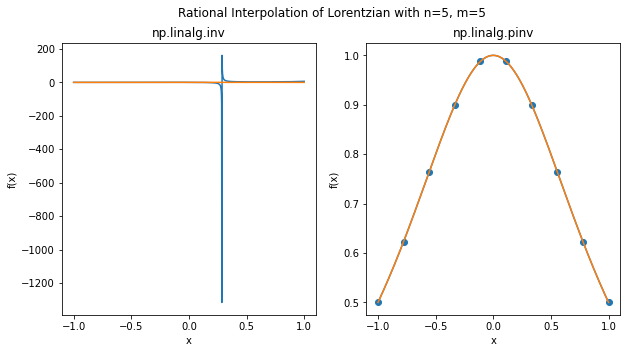

In [473]:
plt.rcParams['figure.figsize'] = (10,5)
fig, axs = plt.subplots(1,2)
ax1 = axs[0]
ax2 = axs[1]

ax1.plot(x_fine, rationalinterp1, label = 'Rational Interpolation')
ax1.plot(x_fine, f2(x_fine), label = 'Exact Function')
#ax1.scatter(x_data, f2(x_data), label = 'Known Data')
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")
ax1.set_title("np.linalg.inv")

ax2.plot(x_fine, rationalinterp2, label = 'Rational Interpolation')
ax2.plot(x_fine, f2(x_fine), label = 'Exact Function')
ax2.scatter(x_data, f2(x_data), label = 'Known Data')
ax2.set_xlabel("x")
ax2.set_ylabel("f(x)")
ax2.set_title("np.linalg.pinv")

fig.suptitle("Rational Interpolation of Lorentzian with n=5, m=5")

plt.show()

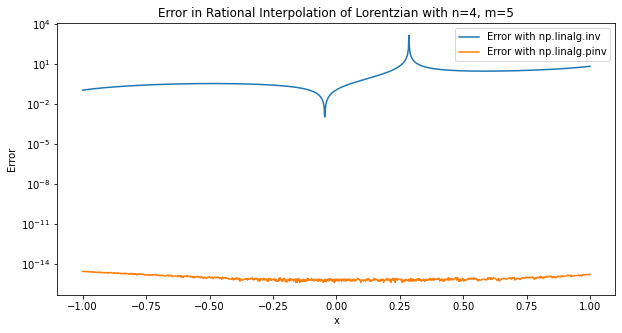

In [474]:
plt.semilogy(x_fine, rationalerror1, label = 'Error with np.linalg.inv')
plt.semilogy(x_fine, rationalerror2, label = 'Error with np.linalg.pinv')
plt.title("Error in Rational Interpolation of Lorentzian with n=4, m=5")
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
plt.show()

Let's look at the rational polynomial fits to figure out why `inv` causes the interpolation to diverge at some point(s).

In [475]:
print("The point where the inv fit is diverging, x = ", x_fine[np.where(rationalerror1 == np.max(rationalerror1))])

The point where the inv fit is diverging, x =  [0.286]


In [476]:
print("Coefficients of P(x) using inv: ", p1_params)
print("\nCoefficients of Q(x) using inv: ", q1_params)

print("\n\nCoefficients of P(x) using pinv: ", p2_params)
print("\nCoefficients of Q(x) using pinv: ", q2_params)

Coefficients of P(x) using inv:  [ 0.88810046 -6.         -2.          0.53125    -0.13406935]

Coefficients of Q(x) using inv:  [-3.5      0.      -0.5      2.       0.03125]


Coefficients of P(x) using pinv:  [ 1.00000000e+00  2.99760217e-15 -3.33333333e-01 -1.27675648e-15
 -1.55431223e-15]

Coefficients of Q(x) using pinv:  [ 3.10862447e-15  6.66666667e-01 -4.44089210e-16 -3.33333333e-01
 -8.88178420e-16]


The two interpolation functions are (using `inv` and `pinv` respectively):

$f_1(x) = \frac{0.8810046 - 6x - 2x^2 + 0.53125 x^3 - 0.13406935x^4}{1 - 3.5x - 0.5x^3 + 2x^4 + 0.03125x^5}$

$f_2(x) = \frac{1 -  \frac{1}{3}x^2}{1 + \frac{2}{3}x^2 - \frac{1}{3}x^4}$

As it turns out, 0.286.. is a pole of $f_1(x)$ where the interpolation blows up. `inv` does a naive inverse of the `PQ` matrix so it retains the spurious pole. This could occur because `PQ` has a zero eigenvalue. This shouldn't be a problem since `PQ` then also has zero determinant and some cancellations should occur that get rid of the pole. `pinv` uses Singular Value Decomposition to handle this issue so it gets rid of the (real) poles. This is confirmed by the fact that $f_2(x)$ has no real poles.

This is connected to how we fix the $q_0$ coefficient to be one by dividing it out of the ratio. If we do not do this, our system will lead to some zero eigenvalues since we have too many coefficients and python is incapable of exactly dividing out factors of $q_0$ due to roundoff errors.